# Harris Corner Detector

[Harris Corner Detector Tutorial](https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html)

[Isaac Berrios's Harris Corner Detector from scratch](https://medium.com/@itberrios6/harris-corner-and-edge-detector-4169312aa2f8)

In [20]:
import sys
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from m2bk import *
# %matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(1)
np.set_printoptions(threshold=sys.maxsize)

dataset_handler = DatasetHandler()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


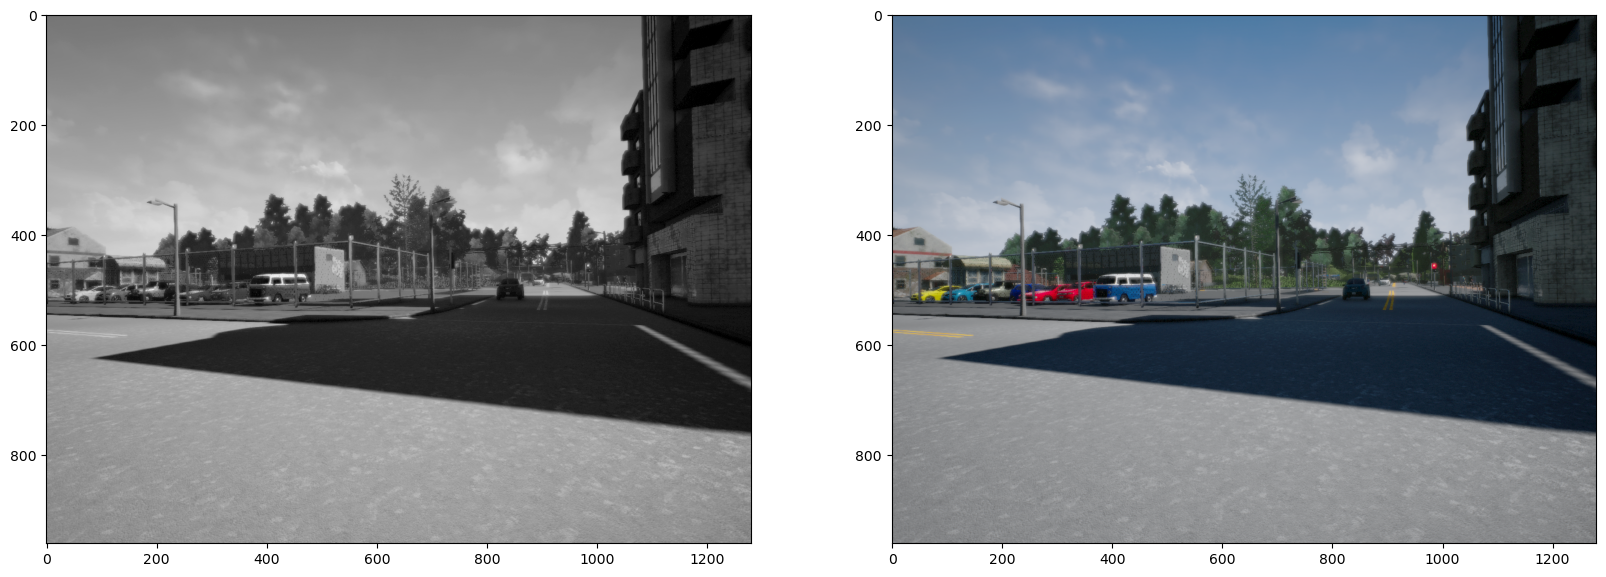

In [44]:
image = dataset_handler.images[0]
image1 = dataset_handler.images_rgb[0].copy()

_, qlayout = plt.subplots(1, 2, figsize=(20, 20))
qlayout[0].imshow(image, cmap='gray')
qlayout[1].imshow(image1)
plt.show()

In [ ]:
thresh_hold = 0.6
k = 0.04

# Sobel, Gaussian kernels
Sx = np.array([ [1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])
Sy = Sx.T

Gxy = np.array([ [1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])/16

def corner_response(image):
    dx = cv.filter2D(image, ddepth=-1, kernel=Sx)
    
    dy = cv.filter2D(image, ddepth=-1, kernel=Sy)

    A = cv.filter2D(dx*dx, ddepth=-1, kernel=Gxy)
    B = cv.filter2D(dy*dy, ddepth=-1, kernel=Gxy)
    C = cv.filter2D(dx*dy, ddepth=-1, kernel=Gxy)

    return (A * B - C * C)  - k * (A + B) * (A + B)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


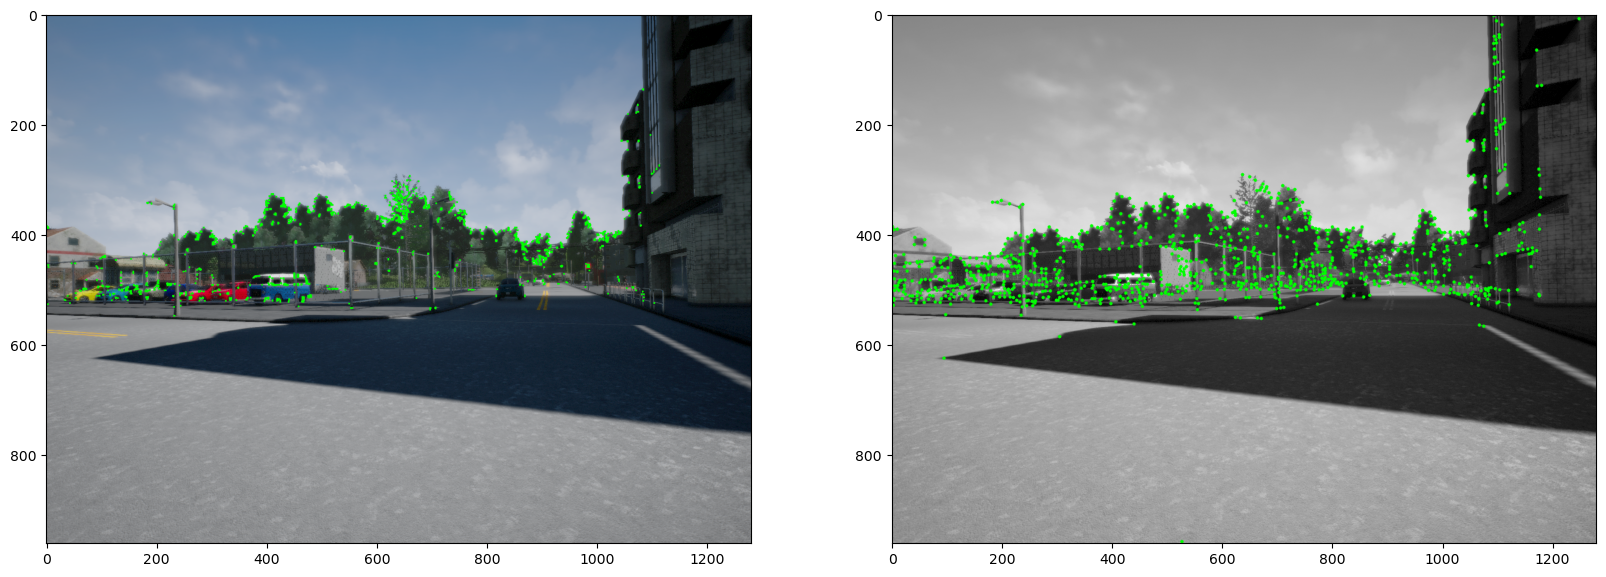

In [65]:
def harris_corners_opencv(img):
    image = img.copy()
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, 2, 3, 0.04)

    #result is dilated for marking the corners, not important
    dst = cv.dilate(dst, None)
    
    # Threshold for an optimal value, it may vary depending on the image.
    image[dst > 0.01*dst.max() ] = [0, 255, 0]
    return image

def harris_corners(img):
    image = img.copy()
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = np.float32(image)
    image /= image.max()

    R = corner_response(image)

    _, _, _, centroids = cv.connectedComponentsWithStats(np.uint8(R > 0.005))
    crit = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    
    # corners = cv.cornerSubPix(image, np.float32(centroids), (9, 9), (-1, -1), crit)
    corners = cv.cornerSubPix(image, np.float32(centroids), (5, 5), (-1, -1), crit)

    oimage = np.dstack((image, image, image))
    for (x, y) in corners:
        x = np.round(x).astype(int)
        y = np.round(y).astype(int)
        cv.circle(oimage, (x, y), radius=3, color=(0, 255, 0), thickness=-1)
    return oimage
    
def harris2_corners_opencv(img):
    image = img.copy()
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)    
    image = np.float32(image)
    image /= image.max()

    dst = cv.cornerHarris(image, 2, 3, 0.04)

    dst = cv.dilate(dst,None)
    ret, dst = cv.threshold(dst, 0.01*dst.max(), 255, 0)
    dst = np.uint8(dst)
    
    ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
    
    # define the criteria to stop and refine the corners
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv.cornerSubPix(image, np.float32(centroids), (5,5), (-1,-1), criteria)
    
    oimage = np.dstack((image, image, image))
    for (x, y) in corners:
        x = np.round(x).astype(int)
        y = np.round(y).astype(int)
        cv.circle(oimage, (x, y), radius=3, color=(0, 255, 0), thickness=-1)
    return oimage

image = dataset_handler.images_rgb[0]

img1 = harris_corners_opencv(image)
img2 = harris_corners(image)

_, qlayout = plt.subplots(1, 2, figsize=(20, 20))
qlayout[0].imshow(img1)
qlayout[1].imshow(img2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


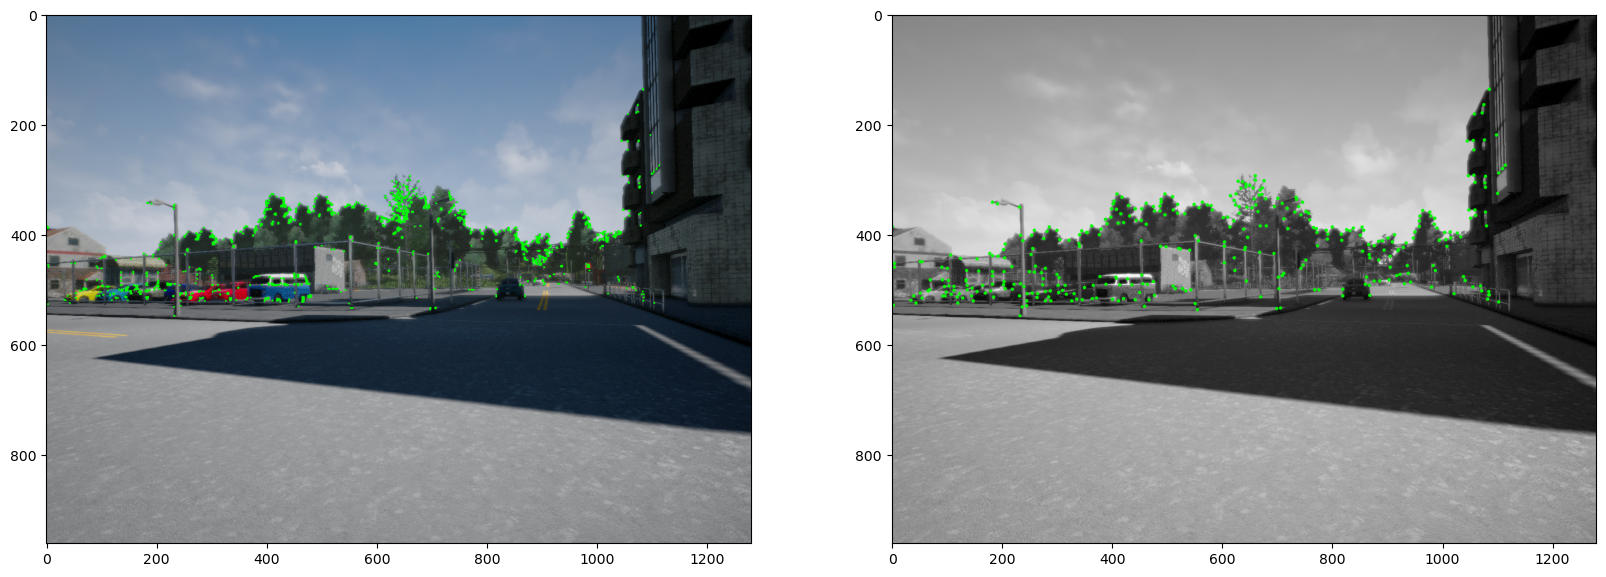

In [64]:
image = dataset_handler.images_rgb[0]
img1 = harris_corners_opencv(image)
img2 = harris2_corners_opencv(image)

_, qlayout = plt.subplots(1, 2, figsize=(20, 20))
qlayout[0].imshow(img1)
qlayout[1].imshow(img2)
plt.show()